# MNIST Autoencoder

We will now work on an autoencoder that operates on the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). This autoencoder will compress the inputs to lower resolution images, and the decoder will generate the original input from this compressed representation.

## Imports

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

## Prepare the Dataset

We will load the MNIST data from TFDS into train and test sets. Let's first define a preprocessing function for normalizing and flattening the images. Since we will be training an autoencoder, this will return `image, image` because the input will also be the target or label while training.

In [ ]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [ ]:
# Defune the hyperparameters for the training
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

# Load the train and test sets from TFDS
train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Build the Model

We will now build a simple autoencoder to ingest the data. The encoder will compress the input and reconstruct it in the decoder output.

In [ ]:
def simple_autoencoder(inputs):
  '''Builds the encoder and decoder using Dense layers.'''
  encoder = tf.keras.layers.Dense(units=32, activation='relu')(inputs)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(encoder)

  return encoder, decoder

# Set the input shape
inputs =  tf.keras.layers.Input(shape=(784,))

# Get the encoder and decoder output
encoder_output, decoder_output = simple_autoencoder(inputs)

# Setup the encoder  to visualize its output later
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

# Setup the autoencoder
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

## Compile the Model

We will set up the model for training. We can use binary crossentropy to measure the loss between pixel values that range from 0 (black) to 1 (white).

In [ ]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy')

## Train the Model

In [ ]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 21s 32ms/step - loss: 0.2270
Epoch 2/50
468/468 [==============================] - 8s 16ms/step - loss: 0.1414
Epoch 3/50
468/468 [==============================] - 11s 23ms/step - loss: 0.1192
Epoch 4/50
468/468 [==============================] - 6s 12ms/step - loss: 0.1076
Epoch 5/50
468/468 [==============================] - 7s 14ms/step - loss: 0.1012
Epoch 6/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0975
Epoch 7/50
468/468 [==============================] - 6s 13ms/step - loss: 0.0956
Epoch 8/50
468/468 [==============================] - 6s 13ms/step - loss: 0.0947
Epoch 9/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0942
Epoch 10/50
468/468 [==============================] - 7s 15ms/step - loss: 0.0939
Epoch 11/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0937
Epoch 12/50
468/468 [==============================] - 7s 14ms/step - loss: 0.0936
Epoch 13/50

## Display sample results

We can now visualize the results. Let's create two functions to do so. The first function will be used to display the sample outputs in a row while the second function will be used to display the input and the encoded and decoded outputs.

In [ ]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 [==============================] - 0s 119ms/step


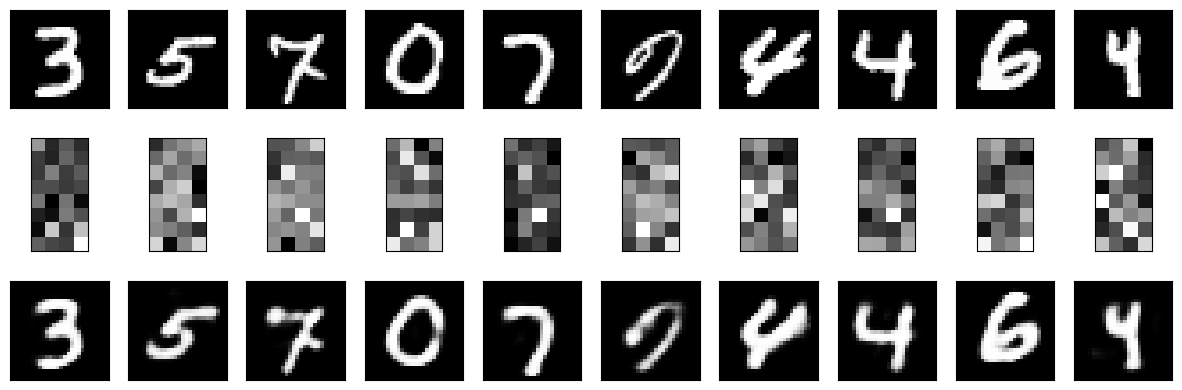

In [ ]:
# Take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# Take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# Pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# Get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# Get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# Display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])